In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM

In [2]:
# Load and preprocess images
data = []
labels = []
dirc_trn = r'C:\Users\moham\Desktop\CodeAlpha\3-Image recognition\asl_alphabet_data'
img_size = 64
classes = os.listdir(dirc_trn)  # Get subfolder (class) names

# Visualizing sample of data

<Figure size 640x480 with 0 Axes>

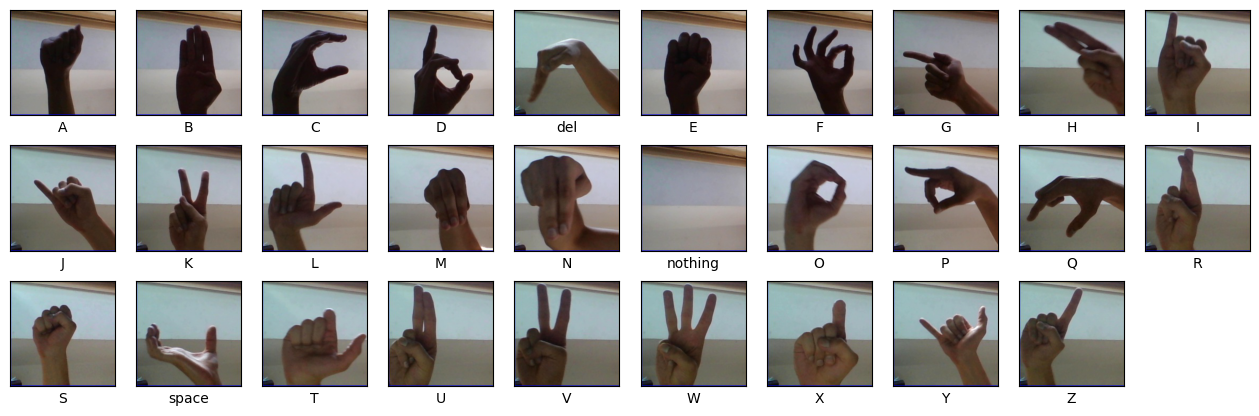

In [3]:
figure = plt.figure()
plt.figure(figsize=(16,5))
for i in range (0,29):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    path = dirc_trn + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

# Pre-processing

In [4]:
# Data normalization

for i, class_name in enumerate(classes):
    path = os.path.join(dirc_trn, class_name)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array, (img_size, img_size))
        data.append(img_array)
        labels.append(i)

data = np.array(data)
data = data / 255.0  # Normalize pixel values
data = data.reshape(data.shape[0], img_size, img_size, 1)  # Reshape for CNN
labels = np.array(labels)
labels = to_categorical(labels, num_classes=len(classes))

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [6]:
# Data augmentation

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Modeling

1- CNN model

In [7]:
# Building stage
model_cnn = Sequential()

model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model_cnn.add(MaxPooling2D(2, 2))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(2, 2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(len(classes), activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
display(model_cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

None

In [9]:
# Training stage
history_cnn = model_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=12)

# Evaluation stage
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/12
1923/1923 [==============================] - 187s 97ms/step - loss: 2.0547 - accuracy: 0.3821 - val_loss: 1.1445 - val_accuracy: 0.6340
Epoch 2/12
1923/1923 [==============================] - 187s 97ms/step - loss: 1.1357 - accuracy: 0.6383 - val_loss: 0.7320 - val_accuracy: 0.7600
Epoch 3/12
1923/1923 [==============================] - 193s 100ms/step - loss: 0.8360 - accuracy: 0.7305 - val_loss: 0.5091 - val_accuracy: 0.8350
Epoch 4/12
1923/1923 [==============================] - 191s 99ms/step - loss: 0.6612 - accuracy: 0.7868 - val_loss: 0.4409 - val_accuracy: 0.8575
Epoch 5/12
1923/1923 [==============================] - 190s 99ms/step - loss: 0.5553 - accuracy: 0.8209 - val_loss: 0.3214 - val_accuracy: 0.8986
Epoch 6/12
1923/1923 [==============================] - 189s 98ms/step - loss: 0.4789 - accuracy: 0.8440 - val_loss: 0.3129 - val_accuracy: 0.9016
Epoch 7/12
1923/1923 [==============================] - 192s 100ms/step - loss: 0.4272 - accuracy: 0.8609 - val_loss:

2- LSTM model

In [10]:
# Building stage
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(len(classes), activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
display(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 29)                1885      
                                                                 
Total params: 34909 (136.36 KB)
Trainable params: 34909 (136.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

In [12]:
# Training stage
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluation stage
test_loss, test_accuracy = model_lstm.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
1923/1923 [==============================] - 34s 16ms/step - loss: 2.5676 - accuracy: 0.2257 - val_loss: 2.0365 - val_accuracy: 0.3479
Epoch 2/10
1923/1923 [==============================] - 31s 16ms/step - loss: 1.7238 - accuracy: 0.4490 - val_loss: 1.4097 - val_accuracy: 0.5509
Epoch 3/10
1923/1923 [==============================] - 31s 16ms/step - loss: 1.2458 - accuracy: 0.5960 - val_loss: 1.1670 - val_accuracy: 0.6091
Epoch 4/10
1923/1923 [==============================] - 31s 16ms/step - loss: 0.9858 - accuracy: 0.6814 - val_loss: 0.9733 - val_accuracy: 0.6738
Epoch 5/10
1923/1923 [==============================] - 31s 16ms/step - loss: 0.8073 - accuracy: 0.7421 - val_loss: 0.6931 - val_accuracy: 0.7814
Epoch 6/10
1923/1923 [==============================] - 33s 17ms/step - loss: 0.6764 - accuracy: 0.7862 - val_loss: 0.6298 - val_accuracy: 0.8043
Epoch 7/10
1923/1923 [==============================] - 32s 17ms/step - loss: 0.5912 - accuracy: 0.8142 - val_loss: 0.5182 -

# Visualization of models

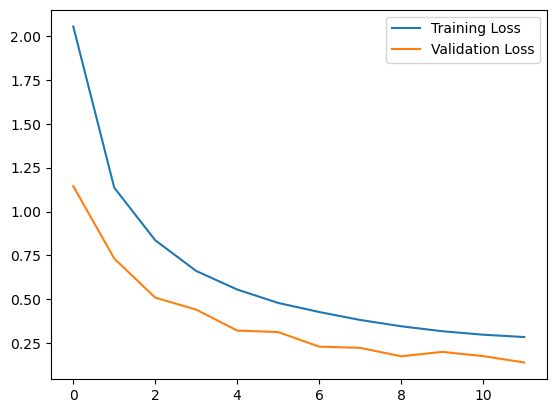

In [14]:
# Plot training history
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

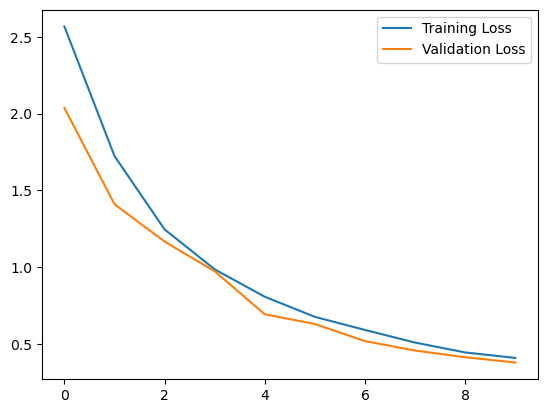

In [15]:
# Plot training history
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()